In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

In [ ]:
data_path = "/content/drive/MyDrive/AI4ALL/Schizophrenia_Dataset"

In [ ]:
labels_path = "/content/drive/MyDrive/AI4ALL/Schizophrenia Dataset/labels_index_CORTICAL_Laus2008_all_scales.mat"
labels_mat = scipy.io.loadmat(labels_path)

In [ ]:
demographics = pd.read_csv('/content/drive/MyDrive/Schizophrenia Dataset/demographics_table.csv')



FileNotFoundError: ignored

In [ ]:
print (demographics)

    Type  SubjectCode    AGE  MEDICATION
0   CTRL            1  25_30        0.00
1   CTRL            2  25_30        0.00
2   CTRL            3  25_30        0.00
3   CTRL            4  25_30        0.00
4   CTRL            5  25_30        0.00
5   CTRL            6  25_30        0.00
6   CTRL            7  25_30        0.00
7   CTRL            8  25_30        0.00
8   CTRL            9  25_30        0.00
9   CTRL           10  30_35        0.00
10  CTRL           11  30_35        0.00
11  CTRL           12  30_35        0.00
12  CTRL           13  30_35        0.00
13  CTRL           14  30_35        0.00
14  CTRL           15  30_35        0.00
15  CTRL           16  30_35        0.00
16  CTRL           17  35_40        0.00
17  CTRL           18  35_40        0.00
18  CTRL           19  35_40        0.00
19  CTRL           20  35_40        0.00
20  CTRL           21  40_45        0.00
21  CTRL           22  40_45        0.00
22  CTRL           23  40_45        0.00
23  CTRL        

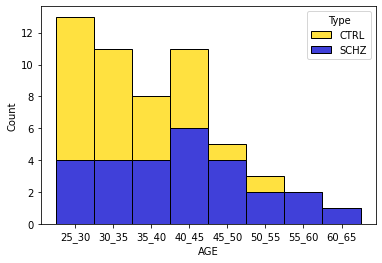

In [ ]:
import seaborn as sns
sns.set_palette(['#FFD700','#0000CD'])
sns.histplot(data=demographics, x="AGE", hue='Type', multiple='stack')



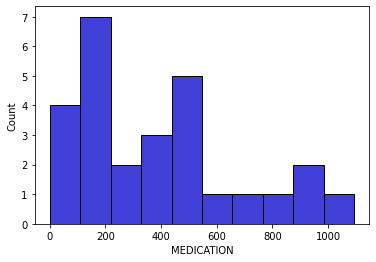

In [ ]:
schz_demographics = demographics.tail(27)
sns.set_palette(['#0000CD'])
sns.histplot(data=schz_demographics, x="MEDICATION", multiple='stack', bins=10)

In [ ]:
print (schz_demographics)

    Type  SubjectCode    AGE  MEDICATION
27  SCHZ           28  35_40      377.18
28  SCHZ           29  30_35      678.49
29  SCHZ           30  30_35      146.55
30  SCHZ           31  35_40      264.88
31  SCHZ           32  55_60      146.55
32  SCHZ           33  45_50      480.00
33  SCHZ           34  25_30      154.39
34  SCHZ           35  50_55        0.00
35  SCHZ           36  40_45      177.78
36  SCHZ           37  25_30      188.96
37  SCHZ           38  40_45        0.00
38  SCHZ           39  55_60      239.43
39  SCHZ           40  30_35      456.63
40  SCHZ           41  35_40     1093.69
41  SCHZ           42  50_55      907.76
42  SCHZ           43  40_45      907.76
43  SCHZ           44  35_40      154.39
44  SCHZ           45  25_30       80.00
45  SCHZ           46  60_65        0.00
46  SCHZ           47  40_45      640.00
47  SCHZ           48  40_45      337.23
48  SCHZ           49  30_35      480.00
49  SCHZ           50  25_30      472.66
50  SCHZ        

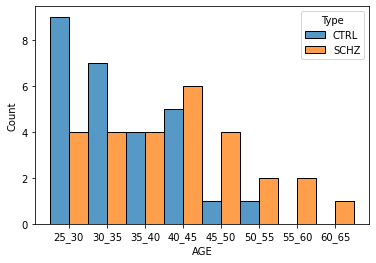

In [ ]:
sns.histplot(data=demographics, x="AGE", hue="Type", multiple="dodge")

In [ ]:
print(labels_mat.keys())
print(type(labels_mat['llist']))
labels_mat['llist']

In [ ]:
df = pd.DataFrame(labels_mat['llist'][0][1])
df

In [ ]:

#with h5py.File('/content/drive/MyDrive/AI4ALL/Schizophrenia Dataset/27_SCHZ_CTRL_dataset.mat', 'r') as file:
    #print(list(file.keys()))
!pip install mat73
import mat73
data_dict = mat73.loadmat('/content/drive/MyDrive/AI4ALL/Schizophrenia Dataset/27_SCHZ_CTRL_dataset.mat')
print(data_dict)

In [ ]:
print(data_dict['SC_FC_Connectomes'].keys())

In [ ]:
print((data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'].shape))

In [ ]:
print((data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'][0]))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data=data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'][:,:,26]

ax = sns.heatmap(plot_data)



In [ ]:
#Mean FC Correlation graphs
mean_ctrl_correlation=np.mean(data_dict['SC_FC_Connectomes']['FC_correlation'][0]['ctrl'],axis=2)
mean_schz_correlation=np.mean(data_dict['SC_FC_Connectomes']['FC_correlation'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_correlation, vmin=-.02, vmax=1)
axes[0].set_title('Schizophrenic correlation')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_correlation, vmin=-.02, vmax=1)
axes[1].set_title('Control correlation')

NameError: ignored

In [ ]:
#Mean ADC graphs
mean_ctrl_adc=np.mean(data_dict['SC_FC_Connectomes']['SC_ADC'][0]['ctrl'],axis=2)
mean_schz_adc=np.mean(data_dict['SC_FC_Connectomes']['SC_ADC'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_adc, vmin=0, vmax=.0016)
axes[0].set_title('Schizophrenic ADC')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_adc, vmin=0, vmax=.0016)
axes[1].set_title('Control ADC')

In [ ]:
#Density Graphs
mean_ctrl_density=np.mean(data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'],axis=2)
mean_schz_density=np.mean(data_dict['SC_FC_Connectomes']['SC_density'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_density, vmin=0, vmax=.03)
axes[0].set_title('Schizophrenic density')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_density, vmin=0, vmax=.03)
axes[1].set_title('Control density')

In [ ]:
#GFA Mean Graphs
mean_ctrl_gfa=np.mean(data_dict['SC_FC_Connectomes']['SC_gFA'][0]['ctrl'],axis=2)
mean_schz_gfa=np.mean(data_dict['SC_FC_Connectomes']['SC_gFA'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_gfa,vmin=0,vmax=.3)
axes[0].set_title('Schizophrenic gFA')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_gfa,vmin=0,vmax=.3)
axes[1].set_title('Control gFA')

In [ ]:
#Mean Fiber length
mean_ctrl_len=np.mean(data_dict['SC_FC_Connectomes']['SC_length_of_fibers'][0]['ctrl'],axis=2)
mean_schz_len=np.mean(data_dict['SC_FC_Connectomes']['SC_length_of_fibers'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_len, vmin=0, vmax=160)
axes[0].set_title('Schizophrenic Fiber Length')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_len, vmin=0, vmax=160)
axes[1].set_title('Control Fiber Length')

In [ ]:
#Mean number of fibers
mean_ctrl_num=np.mean(data_dict['SC_FC_Connectomes']['SC_number_of_fibers'][0]['ctrl'],axis=2)
mean_schz_num=np.mean(data_dict['SC_FC_Connectomes']['SC_number_of_fibers'][0]['schz'],axis=2)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_num, vmin=0, vmax=2000)
axes[0].set_title('Schizophrenic Fiber Count')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_num, vmin=0, vmax=2000)
axes[1].set_title('Control Fiber Count')

In [ ]:
ctrl_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'][1,2,:]
schz_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['schz'][1,2,:]


In [ ]:
import scipy

In [ ]:
scipy.stats.ttest_ind(ctrl_test, schz_test, axis=0, equal_var=True, nan_policy='propagate',
                      permutations=None, random_state=None, alternative='two-sided', trim=0)

In [ ]:
p_values=[]
for x in range(83):
  p_values.append([])
  for y in range(83):
    ctrl_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'][x,y,:]
    schz_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['schz'][x,y,:]
    stat, pval=scipy.stats.ttest_ind(ctrl_test, schz_test, axis=0, equal_var=True, nan_policy='propagate',
                      permutations=None, random_state=None, alternative='two-sided', trim=0)
    #print (pval)
    #p_values[x].append([])

In [ ]:
p_values = np.zeros((83,83))
for x in range(83):
  for y in range(83):
    ctrl_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'][x,y,:]
    schz_test=data_dict['SC_FC_Connectomes']['SC_density'][0]['schz'][x,y,:]
    stat, pval=scipy.stats.ttest_ind(ctrl_test, schz_test, axis=0, equal_var=True, nan_policy='propagate',
                      permutations=None, random_state=None, alternative='two-sided', trim=0)
    p_values[x,y] = pval

In [ ]:

def get_pvalue_mat(group1, group2):
  nrows=group1.shape[0]
  ncols=group1.shape[1]
  pvals = np.zeros((nrows,ncols))
  for x in range(nrows):
    for y in range(ncols):
      group1_vector = group1[x,y,:]
      group2_vector = group2[x,y,:]
      stat, pval=scipy.stats.ttest_ind(group1_vector, group2_vector)
      pvals[x,y] = pval
  return pvals

In [ ]:
pvals_scdensity_0 = get_pvalue_mat(data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl'],data_dict['SC_FC_Connectomes']['SC_density'][0]['schz'])

pvals_scdensity_0.shape

In [ ]:
pvals_scdensity_1 = get_pvalue_mat(data_dict['SC_FC_Connectomes']['SC_density'][1]['ctrl'],data_dict['SC_FC_Connectomes']['SC_density'][1]['schz'])

pvals_scdensity_1.shape

In [ ]:
scdensity_controls = data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl']
scdensity_sz = data_dict['SC_FC_Connectomes']['SC_density'][0]['schz']
_, pvals_scdensity = scipy.stats.ttest_ind(scdensity_controls, scdensity_sz, axis=2)

pvals_scdensity.shape


In [ ]:
#Mean FC Correlation graphs
ctrl_fcs = data_dict['SC_FC_Connectomes']['FC_correlation'][0]['ctrl']
mean_ctrl_correlation=np.mean(ctrl_fcs,axis=2)

schz_fcs=data_dict['SC_FC_Connectomes']['FC_correlation'][0]['schz']
mean_schz_correlation=np.mean(schz_fcs,axis=2)

_, pvals_fc = scipy.stats.ttest_ind(ctrl_fcs, schz_fcs, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_correlation, vmin=-.02, vmax=1)
axes[0].set_title('Schizophrenic correlation')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_correlation, vmin=-.02, vmax=1)
axes[1].set_title('Control correlation')

pval_shape = mean_ctrl_correlation.shape[0] * mean_schz_correlation.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_fc, vmin=0, vmax=thresh)
axes[2].set_title('P-values')

In [ ]:
#ADC Pval
#'FC_correlation', 'SC_ADC', 'SC_density', 'SC_gFA', 'SC_length_of_fibers', 'SC_number_of_fibers',
ctrl_adc = data_dict['SC_FC_Connectomes']['SC_ADC'][0]['ctrl']
mean_ctrl_adc=np.mean(ctrl_fcs,axis=2)

schz_adc=data_dict['SC_FC_Connectomes']['SC_ADC'][0]['schz']
mean_schz_adc=np.mean(schz_fcs,axis=2)
_, pvals_adc = scipy.stats.ttest_ind(ctrl_adc, schz_adc, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_adc, vmin=0, vmax=.0016)
axes[0].set_title('Schizophrenic ADC')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_adc, vmin=0, vmax=.0016)
axes[1].set_title('Control ADC')

pval_shape = mean_ctrl_adc.shape[0] * mean_schz_adc.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_adc, vmin=0, vmax=thresh)
axes[2].set_title('P-values')

In [ ]:
#Density
ctrl_density = data_dict['SC_FC_Connectomes']['SC_density'][0]['ctrl']
mean_ctrl_density=np.mean(ctrl_density,axis=2)

schz_density=data_dict['SC_FC_Connectomes']['SC_density'][0]['schz']
mean_schz_density=np.mean(schz_density,axis=2)
_, pvals_density = scipy.stats.ttest_ind(ctrl_density, schz_density, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_density, vmin=0, vmax=.03)
axes[0].set_title('Schizophrenic density')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_density, vmin=0, vmax=.03)
axes[1].set_title('Control density')

pval_shape = mean_ctrl_density.shape[0] * mean_schz_density.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_density, vmin=0, vmax=thresh)
axes[2].set_title('P-values')

In [ ]:
#'SC_gFA'
ctrl_gFA = data_dict['SC_FC_Connectomes']['SC_gFA'][0]['ctrl']
mean_ctrl_gFA=np.mean(ctrl_gFA,axis=2)

schz_gFA=data_dict['SC_FC_Connectomes']['SC_gFA'][0]['schz']
mean_schz_gFA=np.mean(schz_gFA,axis=2)
_, pvals_gFA = scipy.stats.ttest_ind(ctrl_gFA, schz_gFA, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_gFA, vmin=0,vmax=.3)
axes[0].set_title('Schizophrenic gFA')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_gFA, vmin=0,vmax=.3)
axes[1].set_title('Control gFA')

pval_shape = mean_ctrl_gFA.shape[0] * mean_schz_gFA.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_gFA, vmin=0, vmax=thresh)
axes[2].set_title('P-values')

In [ ]:
#'SC_numfibers'
ctrl_numfibers = data_dict['SC_FC_Connectomes']['SC_number_of_fibers'][0]['ctrl']
mean_ctrl_numfibers=np.mean(ctrl_numfibers,axis=2)

schz_numfibers=data_dict['SC_FC_Connectomes']['SC_number_of_fibers'][0]['schz']
mean_schz_numfibers=np.mean(schz_numfibers,axis=2)
_, pvals_numfibers = scipy.stats.ttest_ind(ctrl_numfibers, schz_numfibers, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_numfibers, vmin=0,vmax=.3)
axes[0].set_title('Schizophrenic numfibers')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_numfibers, vmin=0,vmax=.3)
axes[1].set_title('Control numfibers')

pval_shape = mean_ctrl_numfibers.shape[0] * mean_schz_numfibers.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_numfibers, vmin=0, vmax=thresh)
axes[2].set_title('P-values')

In [ ]:
#'SC_length'
ctrl_length = data_dict['SC_FC_Connectomes']['SC_length_of_fibers'][0]['ctrl']
mean_ctrl_length=np.mean(ctrl_length,axis=2)

schz_length=data_dict['SC_FC_Connectomes']['SC_length_of_fibers'][0]['schz']
mean_schz_length=np.mean(schz_length,axis=2)
_, pvals_length = scipy.stats.ttest_ind(ctrl_length, schz_length, axis=2)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax=sns.heatmap(ax=axes[0], data=mean_schz_length, vmin=0, vmax=160)
axes[0].set_title('Schizophrenic length')

ax=sns.heatmap(ax=axes[1],data=mean_ctrl_length, vmin=0, vmax=160)
axes[1].set_title('Control length')

pval_shape = mean_ctrl_length.shape[0] * mean_schz_length.shape[1]/2
thresh = 0.05/pval_shape
ax=sns.heatmap(ax=axes[2],data=pvals_length, vmin=0, vmax=thresh)
axes[2].set_title('P-values')